**1. Decorator for Logging Execution Time**

**Problem:** Write a decorator log_execution_time that measures and prints the execution time of any function it wraps. Test this decorator with a sample function that calculates the sum of the first n integers.

**Focus:** Decorators, function wrapping, time module.

In [2]:
import time

def log_execution_time(func):
    def wrapper(*args, **kwargs):
        """ 
Inside log_execution_time, a new function wrapper is defined. 
This function uses *args and **kwargs to accept any number of 
positional and keyword arguments that might be passed to the 
original function (func).        
        """
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"{func.__name__} executed in {end_time - start_time:.4f} seconds")
        return result
    return wrapper   

@log_execution_time
def sum_n_integers(n):
    return sum(range(n + 1))
""" 
The @log_execution_time syntax is a decorator that modifies the sum_n_integers 
function. This means that every time sum_n_integers is called, it will actually 
call wrapper, which measures and logs its execution time.
"""
print(sum_n_integers(1000000))     

sum_n_integers executed in 0.0804 seconds
500000500000


**2. Class for Data Handling: Sensor Data Stream**

**Problem:** Implement a class SensorDataStream that accepts a list of readings. Include methods to calculate the moving average, filter out readings below a certain threshold, and compute basic statistics (mean, median).

**Focus:** Class design, instance methods, encapsulation, list comprehension.

In [4]:
from statistics import mean, median

class SensorDataStream:
    def __init__(self, readings):
        self.readings = readings
    
    def moving_average(self, window_size):
        return [mean(self.readings[i:i+window_size]) for i in range(len(self.readings) - window_size +1)]

    def filter_readings(self, threshold):
        return [r for r in self.readings if r >= threshold]
    
    def basic_statistics(self):
        return {
            'mean': mean(self.readings),
            'median': median(self.readings)
        }
      

# Test
sensor_data = SensorDataStream([10, 20, 30, 40, 50, 60])
print(sensor_data.moving_average(3))
print(sensor_data.filter_readings(30))
print(sensor_data.basic_statistics())


[20, 30, 40, 50]
[30, 40, 50, 60]
{'mean': 35, 'median': 35.0}


**3. Comprehensions and Lambda Functions: Data Transformation**

**Problem:** You have a list of GPS coordinates as tuples, e.g., [(lat1, lon1), (lat2, lon2), ...]. Write a one-liner to convert all latitude and longitude values from degrees to radians using math.radians().

**Focus:** List comprehensions, lambda functions, functional programming.

In [6]:
import math
gps_coords = [(34.0522, -118.2437), (40.7128, -74.0060), (51.5074, -0.1278)]
gps_coords_in_radians = [(math.radians(lat), math.radians(lon)) for lat, lon in gps_coords]


print(gps_coords_in_radians)

[(0.594323007547613, -2.063741884740419), (0.7105724077059474, -1.2916483662309235), (0.8989737191417272, -0.002230530784048753)]


**4. Advanced String Manipulation: Path Parsing**

**Problem:** Write a function that takes a Unix-style file path (e.g., /home/user/docs/../scripts/./file.py) and returns the simplified path (e.g., /home/user/scripts/file.py). Handle cases with . and ...

**Focus:** Stack data structure, string manipulation, path parsing.

In [ ]:
def simplify_path(path):
    parts = path.split('/')
    stack = []
    for part in parts:
        if part == '..':
            if stack:
                stack.pop()
        elif part and part!='.':
            stack.append(part)
    return '/'+'/'.join(stack)

# Test
print(simplify_path("/home/user/docs/../scripts/./file.py"))

/home/user/scripts/file.py


**5. File I/O and JSON Parsing: Configuration Management**

**Problem:** Implement a class ConfigManager that loads a JSON configuration file and provides a method to update specific configuration values. It should handle invalid JSON files gracefully.

**Focus:** File I/O, JSON handling, exception handling.

In [10]:
import json

class ConfigManager:
    def __init__(self, file_path):
        self.file_path = file_path
        self.config = self.load_config()
        """ 
This line calls the load_config method to load the 
configuration data from the specified file, storing 
it in the self.config instance variable.        
        """

    def load_config(self):
        try:
            with open(self.file_path, 'r') as file:
                """ 
The with statement ensures that the file is properly 
closed after its block of code is executed, even if 
an error occurs.                
                """
                return json.load(file) 
            """ 
return json.load(file): This line reads the JSON data 
from the file and parses it into a Python dictionary 
or list, returning it.            
            """           
        except (json.JSONDecodeError, FileNotFoundError) as e:
            return {}
        """ 
json.JSONDecodeError: This exception is raised if the JSON 
data in the file is not valid.
FileNotFoundError: This exception is raised if the specified 
file does not exist.
If either of these exceptions occurs, an error message is 
printed, and an empty dictionary {} is returned, indicating 
that no configuration data could be loaded.        
        """
    
    def update_config(self, key, value):
        self.config[key] = value
        """ 
self.config[key] = value: This line updates the config 
dictionary with the new or modified key-value pair.
        """
        with open(self.file_path, 'w') as file:
            json.dump(self.config, file, indent=4)
            """ 
json.dump(self.config, file, indent=4): This line writes the 
updated configuration data back to the file in JSON format, 
with an indentation of 4 spaces for readability.            
            """
# Test
config_manager = ConfigManager("config.json")
config_manager.update_config("setting1", "value1")
config_manager.update_config("setting2", "value2")
config_manager.update_config("setting3", "value3")

print(config_manager.config)

{'setting1': 'value1', 'setting2': 'value2', 'setting3': 'value3'}


**6. Data Structures: Custom Priority Queue for Autonomous Actions**

**Problem:** Create a class ActionQueue that acts as a priority queue for tasks. Implement enqueue to add tasks with priority levels and dequeue to return the highest-priority task.

**Focus:** Custom data structures, heapq module, queue management.



In [12]:
import heapq

class ActionQueue:
    def __init__(self):
        self._queue = []
        self._index = 0
    # priority: The priority of the task. Higher values indicate higher priority.
    def enqueue(self, task, priority):
        heapq.heappush(self._queue, (-priority, self._index, task)) # This line pushes a new tuple onto the heap.
        self._index +=1
        """ 
-priority: The priority is negated to turn the default min-heap 
behavior of heapq into a max-heap. This way, higher priority tasks 
will come out first. For example, if a task has a priority of 10, 
it is stored as -10.
self._index: This maintains the insertion order of tasks. Each task 
gets a unique index value, ensuring that if two tasks have the same 
priority, they are dequeued in the order they were added.
        """    
    def dequeue(self):
        return heapq.heappop(self._queue)[-1]
    # The returned tuple is structured as (-priority, index, task).

# Test
action_queue = ActionQueue()
action_queue.enqueue("brake", 2)
action_queue.enqueue("accelerate", 1)
action_queue.enqueue("turn left", 3)
print(action_queue.dequeue())  # Expected: "turn left"

turn left


**Heap Behavior**

**Min-Heap:** The heapq module in Python implements a min-heap by default. This means that the smallest element is always at the root of the heap and is the first to be popped.

**Max-Heap:** In a max-heap, the largest element is at the root, allowing you to retrieve the highest-priority task first.

**Why Negate the Priority?**
To transform the default min-heap behavior into a max-heap, we negate the priority value when inserting it into the heap. Here's how this works:

Example:
If you have three tasks with priorities:
 - Task A: priority = 5
 - Task B: priority = 10
 - Task C: priority = 1
 
When you call enqueue for these tasks, the priorities will be negated:
 - Task A: -5
 - Task B: -10
 - Task C: -1

Heap Structure
Now, when you add these tasks to the heap:

 - (-5, indexA, "Task A")
 - (-10, indexB, "Task B")
 - (-1, indexC, "Task C")

When you call dequeue, heapq.heappop will pop the smallest value from the heap, which is the most negative (largest absolute value).

**7. Concurrency: Multithreaded Data Collection Simulation**

**Problem:** Simulate data collection from three sensors using threads. Each sensor should run in a separate thread, collect data for 5 seconds, and store readings in a shared list.

**Focus:** Multithreading, synchronization with locks, thread-safe data handling.

In [23]:
import threading
import time
import random

data = []
lock = threading.Lock()
total_time_sensor = 5

def sensor_data(sensor_name):
    for _ in range(total_time_sensor):
        reading = f"{sensor_name} : {random.random()}"
        with lock:
            data.append(reading)
        time.sleep(1)

""" 
Locking: The with lock: statement is used to create 
a critical section:
While the thread is executing this block, it acquires 
the lock, ensuring that no other thread can enter this 
section until the lock is released.
The generated reading is appended to the data list.
"""

threads = [
    threading.Thread(target=sensor_data, args=("GPS",)),
    threading.Thread(target=sensor_data, args=("Lidar",)),
    threading.Thread(target=sensor_data, args=("Camera",)),        
] # Each thread runs the sensor_data function independently and concurrently.

# Starting Execution: The for thread in threads: 
# thread.start() loop starts each thread. Each thread 
# will run sensor_data in parallel, collecting data simultaneously.

for thread in threads:
    thread.start()
""" 
This ensures that the main thread waits for all sensor threads to 
complete before proceeding. The join() method blocks the calling 
thread (the main thread) until the thread whose join() method is 
called is terminated.
"""
for thread in threads:
    thread.join()

print(data)




['GPS : 0.758415102482489', 'Lidar : 0.0957449597164951', 'Camera : 0.6411568442677861', 'GPS : 0.10488998834348362', 'Camera : 0.9900621354291484', 'Lidar : 0.734794130643493', 'GPS : 0.288272665670703', 'Lidar : 0.09277478074969658', 'Camera : 0.19437796498723237', 'GPS : 0.17664484468222064', 'Camera : 0.5514072223590409', 'Lidar : 0.6291558818356635', 'GPS : 0.158787802038178', 'Camera : 0.28684813746542925', 'Lidar : 0.7319664935385801']


| **Component**       | **Description**                                                                 |
|---------------------|---------------------------------------------------------------------------------|
| **Thread**          | Represents a thread of control within a program.                               |
| **Thread(target)**  | Initializes a new thread with the specified target function to run.            |
| **start()**         | Starts the thread's activity. Once started, the thread will run the target function. |
| **join(timeout)**   | Blocks the calling thread until the thread whose `join()` method is called terminates. |
| **is_alive()**      | Returns `True` if the thread is still running; otherwise, it returns `False`.  |
| **Lock**            | A synchronization primitive that can be used to manage access to shared resources. |
| **acquire(blocking=True)** | Acquires the lock, blocking if necessary until it can be acquired.   |
| **release()**       | Releases the lock, allowing other threads to acquire it.                       |
| **RLock**           | A reentrant lock that allows a thread to acquire the lock multiple times.      |
| **Condition**       | A synchronization primitive that allows threads to wait for a certain condition to be met. |
| **Semaphore**       | A synchronization primitive that allows a limited number of threads to access a shared resource. |
| **Event**           | A simple way to communicate between threads. It can be used to signal one or more threads to proceed. |
| **Timer**           | A subclass of Thread that can be used to run a function after a specified interval. |
| **local()**         | Creates a thread-local data object, allowing you to store data that is specific to each thread. |



In [16]:
import threading

def print_numbers():
    for i in range(5):
        print(i)

# Create a thread that targets the print_numbers function
thread = threading.Thread(target=print_numbers)

# Start the thread
thread.start()

print("Thread has started!")


0
1
2
3
4
Thread has started!


In [17]:
import threading
import time

def print_numbers():
    for i in range(5):
        print(i)
        time.sleep(1)

# Create a thread that targets the print_numbers function
thread = threading.Thread(target=print_numbers)

# Start the thread
thread.start()

# Wait for the thread to complete
thread.join()

print("Thread has finished!")


0
1
2
3
4
Thread has finished!


| **Aspect**   | **`start()`**                                     | **`join()`**                                      |
|--------------|--------------------------------------------------|--------------------------------------------------|
| **Purpose**  | Begins the execution of the thread.              | Waits for the thread to finish execution.        |
| **Behavior** | Runs the target function concurrently.           | Blocks the calling thread until the target thread finishes. |
| **Usage**    | Called once to start a thread.                   | Called after starting a thread to wait for it.  |
| **Return**   | Does not return any value.                       | Does not return any value.                       |


**8. Error Handling and Custom Exceptions: Invalid Sensor Reading**

**Problem:** Create a custom exception InvalidReadingError. Write a function that checks sensor readings for validity and raises InvalidReadingError if a reading is invalid.

**Focus:** Custom exceptions, error handling, class inheritance.

In [ ]:
class InvalidReadingError(Exception):
    pass

def validate_reading(value, min_value=0, max_value=100):
    if not (min_value <= value <= max_value):
        raise InvalidReadingError(f"Reading {value} is out of range")
    return value

# testing
try:
    validate_reading(150)
except InvalidReadingError as e:
    print(e)

### Understanding Custom Exceptions in Python

1. **Exception Argument in the Class**
    ```python
    class InvalidReadingError(Exception):
        pass
    ```
    - **What It Is**: `InvalidReadingError` is defined as a subclass of the built-in `Exception` class, making it a custom exception type.
    - **Normal Argument**: The class does not have any arguments in its definition, but you can extend it with a custom initializer if needed.

2. **Raising the Exception**
    ```python
    raise InvalidReadingError(f"Reading {value} is out of range!")
    ```
    - **Instantiation of the Exception**: When raised, it creates an instance of `InvalidReadingError` with a message passed to the constructor.
    - **Exception Message**: The message (`f"Reading {value} is out of range!"`) becomes the string representation of the exception instance.

3. **Handling the Exception**
    ```python
    try:
        validate_reading(150)
    except InvalidReadingError as e:
        print(e)
    ```
    - **`InvalidReadingError` Usage**: This block calls the `validate_reading(150)` function, which raises an `InvalidReadingError` if the reading is out of range.
    - **Catching the Exception**: The `except InvalidReadingError as e:` statement catches the raised exception. `e` references the instance of `InvalidReadingError` that was raised.
    - **No Object Instantiation Required**: You do not need to create an instance of `InvalidReadingError` in the `except` clause; Python does that for you when you raise the exception.

### Summary
- **Custom Exception Class**: `InvalidReadingError` is a subclass of `Exception`, defining a custom exception without additional arguments.
- **Raising an Exception**: Creates an instance of the exception class with a contextual message.
- **Exception Handling**: The `try`/`except` block allows you to catch the exception without instantiating it, using the instance to access details like the message.


**9. Context Manager: Resource Handling for Simulation**

**Problem:** Implement a context manager class SimulatedSensor that simulates opening and closing a sensor connection.

**Focus:** Context manager with __enter__ and __exit__, resource management.



This application will simulate connecting to a remote sensor over a network, attempt retries if the connection fails, log data readings to a file, and handle multiple threads accessing the sensor simultaneously.

We’ll break down the following features:

 - Network Connection Management: Manages a simulated network connection to a remote sensor.

 - Retry Logic: Reconnects if the connection fails, up to a set maximum number of attempts.

 - Error Handling and Logging: Logs each sensor reading and any errors to a file.

 - Multithreading: Allows multiple threads to read data from the sensor concurrently.


In [33]:
import time
import socket
import threading
import random
from datetime  import datetime

class ComprehensiveSensor:
    def __init__(self, host, port, max_retries=3):
        self.host = host
        self.port = port
        self.max_retries = max_retries
        self.connection_attempts = 0
        self.connected = False
        self.lock = threading.Lock()
        self.log_file = "comprehensive_sensor_log.txt"
    def __enter__(self):
        while not self.connected and self.connection_attempts < self.max_retries:
            try: 
                print(f"Attempting conection to {self.host}:{self.port}...")
                self.socket = socket.create_connection((self.host, self.port))
                self.connected = True
                print("connected to the sensor network")
                # open the log file for recording data
                self.log = open(self.log_file, "a")
                return self
            except (socket.error, ConnectionError) as e:
                self.connection_attempts +=1
                print(f"Connection attempt {self.connection_attempts}/{self.max_retries} failed: {e}")
                time.sleep(1) # wait before retrying
        if not self.connected:
            raise ConnectionError("Failed to connect to sensor after multiple attempts.")

    def __exit__(self, exc_type, exc_value, traceback):
        if self.connected:
            print("Closing network connection.")
            self.socket.close()
            self.connected = False
        # close the log file
        self.log.close()
        if exc_type:
            print(f"Error: {exc_value}")
        return True # suppress exceptions
    
    def read_data(self):
        # simulate sensor data read with random values and timestamps
        if not self.connected:
            raise RuntimeError("Sensor is not connected.")
        
        data = f"Sensor data: {random.randint(1,100)}"
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        log_entry = f"{timestamp} - {data}"

        with self.lock:
            # write log entry to the file
            self.log.write(log_entry + "\n")
            print(log_entry)
        return data
    
    def send_data(self, message):
        # use the network coonection to send data
        if not self.connected:
            raise RuntimeError("No connection established to send data.")

        with self.lock:
            print(f"Sending data to server: {message}")
            self.socket.sendall(message.encode('utf-8'))

    def receive_data(self):
        # receive data from the sensor
        if not self.connected:
            raise RuntimeError("No connection established to receive data.")

        with self.lock:
            response = self.socket.recv(1024).decode('utf-8')
            print(f"Received data from server: {response}")
            return response

# define a function for each thread to read and log sensor data
def sensor_task(sensor, task_id):
    try:
        for _ in range(3): # each thread performs 3 readings
            print(f"Task {task_id}: Reading data")
            data = sensor.read_data()
            time.sleep(0.5) # simulate delay between readings
    except RuntimeError as e:
        print(f"Task {task_id} encountered an error: {e}") 

##########################################################################
# Test the ComprehensiveSensor with threading, logging, and error handling
try:
    with ComprehensiveSensor("example.com", 80) as sensor:
        # Create multiple threads for concurrent sensor access
        threads = [threading.Thread(target=sensor_task, args=(sensor, i)) for i in range(3)]
        # Start all threads
        for thread in threads:
            thread.start()
        
        # Wait for all threads to complete
        for thread in threads:
            thread.join()

        # Simulate sending a message and receiving a response from the server
        sensor.send_data("GET / HTTP/1.1\r\nHost: example.com\r\n\r\n")
        sensor.receive_data()

except ConnectionError as e:
    print(f"Failed to connect to the sensor: {e}")
##########################################################################
      


Attempting conection to example.com:80...
connected to the sensor network
Task 0: Reading data
2024-10-29 00:16:41 - Sensor data: 53
Task 1: Reading data
2024-10-29 00:16:41 - Sensor data: 79
Task 2: Reading data
2024-10-29 00:16:41 - Sensor data: 7
Task 0: Reading data
2024-10-29 00:16:41 - Sensor data: 21
Task 1: Reading data
2024-10-29 00:16:41 - Sensor data: 23
Task 2: Reading data
2024-10-29 00:16:41 - Sensor data: 98
Task 0: Reading data
2024-10-29 00:16:42 - Sensor data: 59
Task 1: Reading data
2024-10-29 00:16:42 - Sensor data: 43
Task 2: Reading data
2024-10-29 00:16:42 - Sensor data: 62
Sending data to server: GET / HTTP/1.1
Host: example.com


Received data from server: HTTP/1.1 200 OK
Accept-Ranges: bytes
Age: 542635
Cache-Control: max-age=604800
Content-Type: text/html; charset=UTF-8
Date: Mon, 28 Oct 2024 21:16:42 GMT
Etag: "3147526947+gzip"
Expires: Mon, 04 Nov 2024 21:16:42 GMT
Last-Modified: Thu, 17 Oct 2019 07:18:26 GMT
Server: ECAcc (dcd/7D07)
Vary: Accept-Encoding
X

`socket.create_connection()` is a built-in function in Python, available in the socket module. This function simplifies the process of establishing a TCP connection to a specified network address, such as a host and port.

```python
import socket
socket.create_connection((host, port), timeout=None)
```

**Parameters:**

`(host, port):` A tuple specifying the hostname (or IP address) and port number to connect to.

`timeout (optional):` Specifies the timeout for the connection in seconds. If omitted or None, the global default timeout setting is used.

`Returns:` A new socket object connected to the specified host and port.

---

In [37]:
#Start a Local Server:
"""  
```bash
python3 -m http.server 8080
```
"""

# Python Client to Connect to Local Server:

host = 'localhost'  # Connect to local server
port = 8080

try:
    with socket.create_connection((host, port)) as sock:
        print("Connected to localhost server")
        request = "GET / HTTP/1.1\r\nHost: localhost\r\n\r\n"
        sock.sendall(request.encode('utf-8'))
        response = sock.recv(4096).decode('utf-8')
        print("Server response:\n", response)
except ConnectionError as e:
    print(f"Connection failed: {e}")  

Connected to localhost server
Server response:
 HTTP/1.0 200 OK
Server: SimpleHTTP/0.6 Python/3.12.3
Date: Mon, 28 Oct 2024 21:18:00 GMT
Content-type: text/html; charset=utf-8
Content-Length: 1463

<!DOCTYPE HTML>
<html lang="en">
<head>
<meta charset="utf-8">
<title>Directory listing for /</title>
</head>
<body>
<h1>Directory listing for /</h1>
<hr>
<ul>
<li><a href=".bash_history">.bash_history</a></li>
<li><a href=".bash_logout">.bash_logout</a></li>
<li><a href=".bashrc">.bashrc</a></li>
<li><a href=".cache/">.cache/</a></li>
<li><a href=".config/">.config/</a></li>
<li><a href=".dotnet/">.dotnet/</a></li>
<li><a href=".gitconfig">.gitconfig</a></li>
<li><a href=".gnupg/">.gnupg/</a></li>
<li><a href=".ipython/">.ipython/</a></li>
<li><a href=".jupyter/">.jupyter/</a></li>
<li><a href=".lesshst">.lesshst</a></li>
<li><a href=".local/">.local/</a></li>
<li><a href=".pki/">.pki/</a></li>
<li><a href=".profile">.profile</a></li>
<li><a href=".ssh/">.ssh/</a></li>
<li><a href=".sudo_as

**10. Matrix Calculations and Numpy: Transformations for Localization**

**Problem:** Write a function that takes a list of 2D points and a transformation matrix, applies the matrix to each point, and returns the transformed points.

**Focus:** Matrix operations, numpy usage, linear transformations.

To build a more complex application around matrix transformations and Numpy, let’s add several enhancements:

 - 3D transformations – including translations, rotations, and scaling in a 3D space.

 - Homogeneous coordinates – to apply translations within matrix operations.

 - Multiple transformations – allowing the chaining of transformations in sequence.

 - Visualization – providing a way to visualize the original and transformed points in 3D space.

This will involve using 3x3 or 4x4 matrices and introducing homogeneous coordinates to handle translations in 3D space.

Original Points: [(1, 2, 3), (4, 5, 6), (7, 8, 9)]
Transformed Points: [[ 8.45068854  4.93933983 11.34279327]
 [15.52978337  4.93933983 14.60414519]
 [22.6088782   4.93933983 17.86549711]]


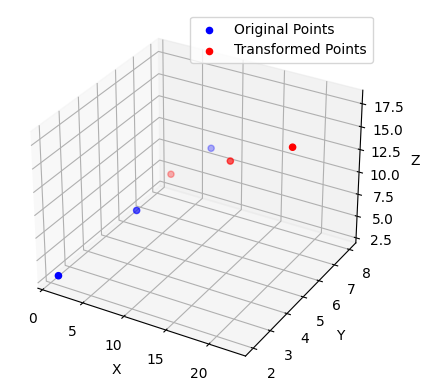

In [41]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D


def transform_points_3d(points, transformation_matrices):
    # convert points to homogeneous coordinates for 3D transformations
    homogeneous_points = np.array([list(point) + [1] for point in points])  # Add 1 for homogeneous coordinates

    # Apply each transformation matrix in sequence
    for matrix in transformation_matrices:
        homogeneous_points = homogeneous_points @ matrix.T  # Transpose for correct matrix multiplication order

    # Return transformed points by dropping the homogeneous coordinate
    return homogeneous_points[:, :3]

def create_rotation_matrix_x(theta):
    """Create a rotation matrix around the X-axis by theta radians."""
    return np.array([
        [1, 0, 0, 0],
        [0, np.cos(theta), -np.sin(theta), 0],
        [0, np.sin(theta), np.cos(theta), 0],
        [0, 0, 0, 1]
    ])

def create_rotation_matrix_y(theta):
    """Create a rotation matrix around the Y-axis by theta radians."""
    return np.array([
        [np.cos(theta), 0, np.sin(theta), 0],
        [0, 1, 0, 0],
        [-np.sin(theta), 0, np.cos(theta), 0],
        [0, 0, 0, 1]
    ])

def create_rotation_matrix_z(theta):
    """Create a rotation matrix around the Z-axis by theta radians."""
    return np.array([
        [np.cos(theta), -np.sin(theta), 0, 0],
        [np.sin(theta), np.cos(theta), 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])

def create_translation_matrix(dx, dy, dz):
    """Create a translation matrix for translating by dx, dy, dz."""
    return np.array([
        [1, 0, 0, dx],
        [0, 1, 0, dy],
        [0, 0, 1, dz],
        [0, 0, 0, 1]
    ])

def create_scaling_matrix(sx, sy, sz):
    """Create a scaling matrix for scaling by sx, sy, sz."""
    return np.array([
        [sx, 0, 0, 0],
        [0, sy, 0, 0],
        [0, 0, sz, 0],
        [0, 0, 0, 1]
    ])

# visualization function
def plot_3d_points(original_points, transformed_points):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # plot original points
    original_points = np.array(original_points)
    ax.scatter(original_points[:, 0], original_points[:, 1], original_points[:, 2], c='blue', label='Original Points')
    # Plot transformed points
    transformed_points = np.array(transformed_points)
    ax.scatter(transformed_points[:, 0], transformed_points[:, 1], transformed_points[:, 2], c='red', label='Transformed Points')

    ax.legend()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()


# Test
points = [
    (1, 2, 3),
    (4, 5, 6),
    (7, 8, 9)
]    
# Define transformation matrices
rotation_x = create_rotation_matrix_x(np.pi / 4)  # Rotate 45 degrees around X-axis
rotation_y = create_rotation_matrix_y(np.pi / 6)  # Rotate 30 degrees around Y-axis
translation = create_translation_matrix(3, 4, 5)  # Translate by (3, 4, 5)
scaling = create_scaling_matrix(1.5, 1.5, 1.5)    # Scale by 1.5 in all directions

# Apply transformations
transformed_points = transform_points_3d(points, [rotation_x, rotation_y, translation, scaling])

# Display results
print("Original Points:", points)
print("Transformed Points:", transformed_points)

# Visualize the transformation
plot_3d_points(points, transformed_points)






# Converting Points to Homogeneous Coordinates for 3D Transformations

In computer graphics and geometric transformations, homogeneous coordinates are an extension of traditional Cartesian coordinates. They make it easier to represent and compute transformations such as translation, scaling, rotation, and perspective projection.

## What It Means to "Convert Points to Homogeneous Coordinates"
When you see a comment like `# Convert points to homogeneous coordinates for 3D transformations`, it usually indicates that 3D points, originally in Cartesian coordinates, are being transformed to homogeneous coordinates by adding an extra dimension.

## Homogeneous Coordinates Explained

### Standard Cartesian Coordinates:
In 3D space, a point is represented as \((x, y, z)\).

### Homogeneous Coordinates:
In homogeneous coordinates, a point is represented as \((x, y, z, w)\), where \(w\) is a non-zero scalar.  
- When \(w = 1\), the homogeneous coordinates are equivalent to Cartesian coordinates: \((x, y, z) \rightarrow (x, y, z, 1)\).
- For other values of \(w\) (e.g., \(w = 2\)), you normalize back to Cartesian by dividing each component by \(w\):  
  \[(x, y, z, w) \rightarrow \left(\frac{x}{w}, \frac{y}{w}, \frac{z}{w}\right)\]

## Benefits of Using Homogeneous Coordinates

### 1. Unified Representation:
Homogeneous coordinates allow for a unified representation of transformations (translation, rotation, scaling) through matrix multiplication, simplifying calculations in graphics programming.

### 2. Translation:
In Cartesian coordinates, translation requires adding a vector. With homogeneous coordinates, translation is achievable using matrix multiplication, compatible with other transformations.

### 3. Perspective Projection:
Homogeneous coordinates also enable easier perspective transformations, which are crucial for rendering 3D graphics onto 2D screens.

## Example
Consider a point in 3D space at coordinates \((3, 4, 5)\). Converting this to homogeneous coordinates looks like:

```python
point_cartesian = (3, 4, 5)
point_homogeneous = (3, 4, 5, 1)  # w = 1 for points
```
The homogeneous coordinates allow us to apply transformations like rotation or translation using matrix operations. After transformation, you can convert back to Cartesian as needed.

## Summary
- Homogeneous coordinates add an extra dimension to simplify geometric transformations.
- Enable matrix operations for translation, rotation, and scaling.
- Essential for perspective projection in 3D graphics.


**3. Data Preprocessing for Machine Learning**

**Problem:** Write a function to preprocess a dataset by normalizing the features to a range of [0, 1]. Given a 2D list of features, return a new 2D list with normalized values.

**Focus:** Data manipulation, normalization techniques.



In [48]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

class DataPreprocessor:
    def __init__(self):
        self.scaler = MinMaxScaler()  # For normalization
        self.encoder = OneHotEncoder(sparse=False)  # For one-hot encoding
        self.num_imputer = SimpleImputer(strategy='mean')  # For handling missing values
        self.cat_imputer = SimpleImputer(strategy='most_frequent')  # For handling missing values in categorical data

    def normalize_data(self, data):
        """Normalizes numerical features to a range of [0, 1]."""
        return self.scaler.fit_transform(data)

    def standardize_data(self, data):
        """Standardizes features by removing the mean and scaling to unit variance."""
        return StandardScaler().fit_transform(data)

    def encode_categorical(self, categorical_data):
        """Encodes categorical features using one-hot encoding."""
        return self.encoder.fit_transform(categorical_data)

    def handle_missing_values(self, data, is_numerical=True):
        """Handles missing values in the dataset."""
        if is_numerical:
            return self.num_imputer.fit_transform(data)
        else:
            return self.cat_imputer.fit_transform(data)

    def preprocess(self, numerical_data, categorical_data):
            """Combines all preprocessing steps."""
            # Handle missing values
            numerical_data = self.handle_missing_values(numerical_data, is_numerical=True)
            categorical_data = self.handle_missing_values(categorical_data, is_numerical=False)


            # Normalize numerical data
            normalized_numerical = self.normalize_data(numerical_data)

            # Encode categorical data
            encoded_categorical = self.encode_categorical(categorical_data)

            return np.hstack((normalized_numerical, encoded_categorical))
        

# Example usage
if __name__ == "__main__":
    # Sample dataset with numerical and categorical features
    numerical_data = [[1, 2], [2, None], [4, 5]]
    categorical_data = [['A'], ['B'], ['A']]

    preprocessor = DataPreprocessor()

    # Preprocess the dataset
    preprocessed_data = preprocessor.preprocess(numerical_data, categorical_data)


preprocessed_df = pd.DataFrame(preprocessed_data)
preprocessed_df

,0,1,2,3
0,0.000000,0.0,1.0,0.0
1,0.333333,0.5,0.0,1.0
2,1.000000,1.0,1.0,0.0


In [45]:
import numpy as np

# Create two 2D arrays
array1 = np.array([[1, 2, 3],
                   [4, 5, 6]])

array2 = np.array([[7, 8, 9],
                   [10, 11, 12]])

# Horizontally stack the arrays
result = np.hstack((array1, array2))

print(result)


[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]


In [44]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Sample categorical data
data = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Blue']})

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
one_hot_encoded = encoder.fit_transform(data[['Color']])

# Convert to DataFrame for better visualization
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Color']))

print(one_hot_df)


   Color_Blue  Color_Green  Color_Red
0         0.0          0.0        1.0
1         1.0          0.0        0.0
2         0.0          1.0        0.0
3         1.0          0.0        0.0


# Explanation of the Code

## Class Structure
We define a class `DataPreprocessor` that encapsulates all preprocessing methods.

## Methods

- **normalize_data**: Normalizes numerical data to the range [0, 1].
- **standardize_data**: (Optional) Standardizes data by removing the mean and scaling to unit variance.
- **encode_categorical**: Uses one-hot encoding for categorical data.
- **handle_missing_values**: Fills missing values using the mean of each column.
- **preprocess**: Combines the handling of missing values, normalization, and encoding in one method.

## Example Usage
The sample dataset contains both numerical and categorical features. After preprocessing, the results are printed in a pandas DataFrame for clarity.

# Key Concepts

- **Normalization**: Scaling numerical features to a specific range helps improve the convergence of optimization algorithms.
- **One-Hot Encoding**: Converts categorical variables into a format that can be provided to machine learning algorithms to do a better job in prediction.
- **Handling Missing Values**: Missing data can negatively impact the performance of machine learning models. This method replaces missing values with the mean of the column.


| Feature          | MinMaxScaler                           | StandardScaler                       |
|------------------|----------------------------------------|-------------------------------------|
| **Purpose**      | Scales features to a range (0, 1) or (-1, 1) | Standardizes features to have mean 0 and variance 1 |
| **Formula**      | ( X' = {X - X_{min}}{X_{max} - X_{min}} ) | ( X' = {X - mu}{sigma} ) |
| **Effect on Data** | Rescales data based on the minimum and maximum values | Centers data around the mean and scales according to the standard deviation |
| **Use Cases**    | When the distribution of data is not Gaussian and you want to preserve relationships | When the data follows a Gaussian distribution |
| **Sensitivity**  | Sensitive to outliers (can compress the range) | Less sensitive to outliers (but can still be affected) |
| **Resulting Range** | Values are between 0 and 1 (or -1 and 1) | Values can range from negative to positive, typically around 0 |
| **Implementation** | `from sklearn.preprocessing import MinMaxScaler` | `from sklearn.preprocessing import StandardScaler` |


The `SimpleImputer` class from the `sklearn.impute` module in Scikit-learn is used for handling missing values in datasets. It provides a straightforward way to fill in missing values based on different strategies. Here’s an overview of its functionality:

### Key Features of SimpleImputer

#### Imputation Strategies:
- **mean**: Replaces missing values with the mean of the column.
- **median**: Replaces missing values with the median of the column.
- **most_frequent**: Replaces missing values with the most frequently occurring value in the column.
- **constant**: Replaces missing values with a specified constant value.

#### Flexible Handling:
- You can specify which columns to impute using `fit` and `transform` methods, allowing selective imputation.

#### Fit and Transform:
- The `fit` method computes the necessary statistics (like mean, median, etc.) from the training data.
- The `transform` method applies the computed statistics to fill in the missing values.
- You can also use `fit_transform` to do both in one step.

#### Pipeline Compatibility:
- `SimpleImputer` can be easily integrated into Scikit-learn pipelines, allowing for seamless preprocessing steps before model training.


# Difference Between Sparse and Dense Representations

The difference between sparse and dense representations in the context of one-hot encoding (and more broadly in data representation) lies primarily in how the data is stored and the memory efficiency of each format. Let’s break this down:

## Definitions

- **Dense Array**: A dense array is a standard multi-dimensional array (like a NumPy array) where every element is stored, regardless of its value. For one-hot encoded data, this means that all the 0s and 1s are explicitly stored in memory.

- **Sparse Matrix**: A sparse matrix is a data structure that only stores non-zero elements along with their indices. This is particularly useful when dealing with large datasets where most of the values are zeros (which is common in one-hot encoding). Sparse matrices can significantly reduce memory usage.

## Example

Let's consider a simple categorical feature with three categories: Red, Green, and Blue. If we one-hot encode this feature, the results would look like this:

| Index | Color |
|-------|-------|
| 0     | Red   |
| 1     | Blue  |
| 2     | Green |
| 3     | Blue  |

## One-Hot Encoding Output

Using one-hot encoding, we can represent this data as follows:

### Dense Representation (sparse=False)

```plaintext
  Color_Red  Color_Green  Color_Blue
0        1.0          0.0         0.0
1        0.0          0.0         1.0
2        0.0          1.0         0.0
3        0.0          0.0         1.0
```

This output explicitly shows every element, including all the zeros. Each row corresponds to an original category, and the columns represent the presence of each category.

## Sparse Representation (sparse=True)

When using sparse representation, only the non-zero entries and their corresponding indices are stored. For example, using a sparse matrix, the output might be represented like this:

```plaintext
  (0, 0)    1.0
  (1, 2)    1.0
  (2, 1)    1.0
  (3, 2)    1.0
```

This indicates that:

- The first row has a `1` at column `0` (for `Color_Red`).
- The second row has a `1` at column `2` (for `Color_Blue`).
- The third row has a `1` at column `1` (for `Color_Green`).
- The fourth row has a `1` at column `2` (for `Color_Blue`).

## Memory Efficiency

### Memory Usage:

- **Dense**: Takes up more memory because all elements are stored, including many zeros. This can be inefficient for large datasets with many categories and many rows.
- **Sparse**: More memory-efficient, especially for datasets where many categories are not present. Only non-zero entries are stored, which can lead to significant memory savings.

### Processing Time:

Sparse matrices can lead to faster computations in some algorithms because they skip over the zero entries. However, not all algorithms are optimized for sparse data, so this can vary.

## When to Use Each Representation

### Use Dense:

- When the number of categories is small relative to the dataset size, leading to fewer zeros.
- When working with algorithms that require dense input formats.

### Use Sparse:

- When dealing with high-dimensional data with many categories (e.g., text data or large categorical variables) where most values are zeros.
- When memory efficiency is critical.

## Summary

In summary, the choice between sparse and dense representations depends on the characteristics of your dataset and the requirements of the algorithms you plan to use. Understanding the implications of each format can help you optimize memory usage and computational efficiency.


---

**1. Merge Intervals**

**Problem:** Given a collection of intervals, merge all overlapping intervals.

In [58]:
def merge_intervals(intervals):
    if not intervals:
        return []

    intervals.sort(key=lambda x: x[0])
    merged = [intervals[0]]

    for current in intervals[1:]:
        last_merged = merged[-1]
        if current[0] <= last_merged[1]:
            last_merged[1] = max(last_merged[1], current[1])
        else:
            merged.append(current)

    return merged

# Example Usage
intervals = [[1,3],[2,6],[8,10],[15,18]]
print(merge_intervals(intervals))  # Output: [[1, 6], [8, 10], [15, 18]]

    

[[1, 6], [8, 10], [15, 18]]


In [56]:
intervals = [[2,6],[1,3],[30,50],[15,18]]
intervals.sort(key=lambda x:x[0])
merged = [intervals[0]]
merged

[[1, 3]]

# **Python Features**

## `map()`

 - The map() function in Python applies a given function to all items in an iterable (e.g., list, tuple) and returns a map object, which is an iterator.

In [33]:
names = ["alice", "bob", "charlie"]
upper_names = list(map(str.upper, names))
print(upper_names)

numbers = [1,2,3,4,5]
squared_numbers = list(map(lambda x: x**2, numbers))
print(squared_numbers)

str_numbers = ["1","2","3"]
int_numbers = list(map(int, str_numbers))
print(int_numbers)

list1 = [1,2,3,4,5,6]
list2 = [1,2,3,4,5,6]
summed_list = list(map(lambda x, y: x+y, list1, list2))
print(summed_list)

people = [
    {"name": "ahmed ", "age": 25},
    {"name": "soad  ", "age": 22},
    {"name": "noha  ", "age": 24},
    {"name": "mariam", "age": 21},
]
names = list(map(lambda x: x["name"], people))
print(names)

celsius = [1,22,32]
fahrenheit = list(map(lambda x: (x * 9/5) + 32, celsius))
print(fahrenheit)

data = ["   ahmed", "mariam", "          ahmed lov mariam     "]
clean_data = list(map(lambda s: s.strip().lower(), data))
print(clean_data)

grades = {"ahmed":90, "mariam":89, "others":0}
curved_grades = dict(map(lambda x: (x[0],x[1]+10), grades.items()))
print(curved_grades)

""" 
Suppose we have a list of dictionaries with inconsistent keys. We can 
use map() to normalize the keys across all dictionaries.
"""
data = [
    {"Name": "Alice", "AGE": 25, "Country": "USA"},
    {"name": "Bob", "age": 30, "Country": "Canada"},
    {"NAME": "Charlie", "Age": 35, "country": "UK"}
]
normalized_data = list(map(lambda x:{
    "name"   :x.get("Name") or x.get("name") or x.get("NAME"),
    "age"    :x.get("AGE") or x.get("Age") or x.get("age"),
    "country":x.get("Country") or x.get("Country") or x.get("country"),
}, data))
print(normalized_data)

from datetime import datetime
dates = ["2023-10-01", "01/10/2023", "Oct 1, 2023"]
parsed_dates = list(map(lambda date: datetime.strptime(
    date, "%Y-%m-%d") if "-" in date else datetime.strptime(date, "%d/%m/%Y") if "/" in date else datetime.strptime(date, "%b %d, %Y"), dates))
formatted_dates = list(map(lambda date: date.strftime("%d-%m-%Y"), parsed_dates))
print(formatted_dates)


# Using map() with reduce() to apply a chain of transformations to each item in a list.
from functools import reduce
numbers = [1, 2, 3, 4]
squares = map(lambda x: x ** 2, numbers)  # Squares each number, giving [1, 4, 9, 16]
product_of_squares = reduce(lambda x, y: x * y, squares)  # Multiplies the squares, giving 576
print(product_of_squares)  # Output: 576

data = ["   HELLO   ", "   WORLD  ", "  PyThOn  "]
transformation = [str.strip, str.lower, str.capitalize]
processed_data = list(map(lambda x:reduce(lambda v,f: f(v),transformation, x), data))
print(processed_data)

matrix = [
    [1,2,3],
    [2,3,4],
    [3,4,5]
]
squared_matrix = list(map(lambda row: list(map(lambda x: x**2, row)) , matrix))
print(squared_matrix)



numbers = [-10, 15, -20, 25, -5, 30]
positive_squares = list(map(lambda x: x**2, filter(lambda x: x>0, numbers)))
print(positive_squares)


first_names = ["John", "Jane", "Jim"]
last_names = ["Doe", "Smith", "Beam"]
ages = [28, 34, 45]
formattedStrings = list(map(lambda fn, ln, age: f"{fn} {ln} is {age} years old", first_names, last_names, ages))
print(formattedStrings)


from itertools import chain
""" 
chain(*...):

The chain function combines all of its input 
iterables into a single iterable.
"""
nested_list = [[1,2,3], [4,5], [6,7,8,9]]
flattened_list = list(chain(*map(lambda x: x, nested_list)))
print(flattened_list)


import pandas as pd
data = {
    "name": ["Alice", "Bob", "Charlie"],
    "gender": ["F", "M", "M"]
}
df = pd.DataFrame(data)
gender_map = {"F":"Female", "M":"Male"}
df["gender_full"] = df["gender"].map(gender_map)
df

['ALICE', 'BOB', 'CHARLIE']
[1, 4, 9, 16, 25]
[1, 2, 3]
[2, 4, 6, 8, 10, 12]
['ahmed ', 'soad  ', 'noha  ', 'mariam']
[33.8, 71.6, 89.6]
['ahmed', 'mariam', 'ahmed lov mariam']
{'ahmed': 100, 'mariam': 99, 'others': 10}
[{'name': 'Alice', 'age': 25, 'country': 'USA'}, {'name': 'Bob', 'age': 30, 'country': 'Canada'}, {'name': 'Charlie', 'age': 35, 'country': 'UK'}]
['01-10-2023', '01-10-2023', '01-10-2023']
576
['Hello', 'World', 'Python']
[[1, 4, 9], [4, 9, 16], [9, 16, 25]]
[225, 625, 900]
['John Doe is 28 years old', 'Jane Smith is 34 years old', 'Jim Beam is 45 years old']
[1, 2, 3, 4, 5, 6, 7, 8, 9]


,name,gender,gender_full
0,Alice,F,Female
1,Bob,M,Male
2,Charlie,M,Male


| Method           | Description                                                                                         | Usage Example                                                 | Output Example                   |
|------------------|-----------------------------------------------------------------------------------------------------|---------------------------------------------------------------|----------------------------------|
| `strip()`        | Removes leading and trailing whitespace (or specified characters) from a string.                    | `"  Hello  ".strip()`                                         | `"Hello"`                        |
| `lstrip()`       | Removes only leading (left) whitespace or specified characters from a string.                       | `"  Hello  ".lstrip()`                                        | `"Hello  "`                      |
| `rstrip()`       | Removes only trailing (right) whitespace or specified characters from a string.                     | `"  Hello  ".rstrip()`                                        | `"  Hello"`                      |
| `strptime()`     | Parses a date string into a `datetime` object based on the specified format.                        | `datetime.strptime("2023-10-05", "%Y-%m-%d")`                 | `datetime.datetime(2023, 10, 5)` |
| `strftime()`     | Formats a `datetime` object as a string based on the specified format.                             | `datetime.now().strftime("%Y-%m-%d %H:%M:%S")`               | `"2024-10-30 14:30:00"`         |
| `split()`        | Splits a string by whitespace (or a specified separator) into a list of substrings.                 | `"Hello, World!".split(",")`                                  | `["Hello", " World!"]`           |
| `partition()`    | Splits a string into a tuple with three elements: part before separator, separator, and part after. | `"Hello, World!".partition(",")`                              | `("Hello", ",", " World!")`      |
| `rstrip("\n")`   | Removes trailing newline characters from a string.                                                  | `"Hello\n".rstrip("\n")`                                      | `"Hello"`                        |
---
| Method            | Description                                                                                          | Usage Example                     | Output Example     |
|-------------------|------------------------------------------------------------------------------------------------------|-----------------------------------|--------------------|
| `str.strip()`     | Removes leading and trailing whitespace (or specified characters) from a string.                     | `"  Hello  ".strip()`             | `"Hello"`          |
| `str.lower()`     | Converts all characters in a string to lowercase.                                                    | `"Hello World".lower()`           | `"hello world"`    |
| `str.capitalize()`| Capitalizes the first character of a string and lowercases all other characters
---
| Function                    | Description                                                        | Example Usage                                           | Result       |
|-----------------------------|--------------------------------------------------------------------|--------------------------------------------------------|--------------|
| `filter`                    | Filters items based on a condition.                               | `filter(lambda x: x % 2 == 0, [1, 2, 3, 4])`        | `[2, 4]`     |
| `map`                       | Applies a function to each item, transforming the data.           | `map(lambda x: x ** 2, [1, 2, 3])`                   | `[1, 4, 9]`  |
| `reduce`                    | Reduces an iterable to a single value using a cumulative function. | `reduce(lambda x, y: x + y, [1, 2, 3, 4])`           | `10`         |
| **map with filter**         | Applies a transformation to filtered items.                       | `map(lambda x: x ** 2, filter(lambda x: x > 2, [1, 2, 3, 4]))` | `[9, 16]`    |
| **filter with map**         | Filters transformed items.                                        | `filter(lambda x: x > 4, map(lambda x: x ** 2, [1, 2, 3, 4]))` | `[9, 16]`    |
| **reduce with map**         | Reduces the transformed items to a single value.                 | `reduce(lambda x, y: x + y, map(lambda x: x ** 2, [1, 2, 3, 4]))` | `30`         |
| **reduce with filter**      | Reduces the filtered items to a single value.                    | `reduce(lambda x, y: x + y, filter(lambda x: x % 2 == 0, [1, 2, 3, 4]))` | `6`          |
| **Chaining**                | Combines `filter`, `map`, and `reduce` for complex transformations. | `reduce(lambda acc, x: acc + x, map(lambda x: x ** 2, filter(lambda x: x % 2 == 0, data)))` | `220`       |
